In [38]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout, Activation, Flatten, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt

In [6]:
# CIFAR_10 is a set of 60K images 32x32 pixels on 3 channels
IMG_CHANNELS = 3
IMG_ROWS = 32
IMG_COLS = 32

print('Image variables initialisation')

Image variables initialisation


In [7]:
(input_X_train, output_y_train), (input_X_test, output_y_test) = cifar10.load_data()
print('input_X_train shape:', input_X_train.shape)
print(input_X_train.shape[0], 'train samples')
print(input_X_test.shape[0], 'test samples')
 
# convert to categorical
output_Y_train = utils.to_categorical(output_y_train, N_CLASSES)
output_Y_test = utils.to_categorical(output_y_test, N_CLASSES) 

# float and normalization
input_X_train = input_X_train.astype('float32')
input_X_test = input_X_test.astype('float32')
input_X_train /= 255
input_X_test /= 255

input_X_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [31]:
# # network definition

# N_CLASSES = 10

# # model = Sequential([
# #     Input(shape=(IMG_ROWS, IMG_COLS, IMG_CHANNELS)),
# #     Conv2D(32, (3, 3), padding='same'),
# #     Activation('relu'),
# #     MaxPooling2D(pool_size=(2, 2)),
# #     Dropout(0.25),
  
# #     Flatten(),
# #     Dense(512),
# #     Activation('relu'),
# #     Dropout(0.5),

# #     Dense(N_CLASSES),
# #     Activation('softmax')
# # ])

# # Complex DNN model definition
# model = Sequential()
 
# model.add(Conv2D(32, kernel_size=3, padding='same', input_shape=(IMG_ROWS, IMG_COLS, IMG_CHANNELS)))
# model.add(Activation('relu'))
# model.add(Conv2D(32, kernel_size=3, padding='same'))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))
 
# model.add(Conv2D(64, kernel_size=3, padding='same'))
# model.add(Activation('relu'))
# model.add(Conv2D(64, 3, 3))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))
 
# model.add(Flatten())
# model.add(Dense(512))
# model.add(Activation('relu'))
# model.add(Dropout(0.5))
# model.add(Dense(N_CLASSES))
# model.add(Activation('softmax'))

print('CNN network definition.')

CNN network definition.


In [32]:
# optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001, rho=0.9, momentum=0.0, epsilon=1e-07, centered=False)

# model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_24 (Activation)      │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_25 (Activation)      │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_26 (Activation)      │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 5, 5, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_27 (Activation)      │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 2, 2, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 2, 2, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 512)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_28 (Activation)      │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 10)             │         5,130 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_29 (Activation)      │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 202,282 (790.16 KB)

 Trainable params: 202,282 (790.16 KB)

 Non-trainable params: 0 (0.00 B)

In [33]:
# #training constants
# BATCH_SIZE = 128
# N_EPOCH = 20 # use 20 for best initial results
# VERBOSE = 1
# VALIDATION_SPLIT = 0.2

In [34]:
# history = model.fit(input_X_train, output_Y_train, batch_size=BATCH_SIZE, epochs=N_EPOCH, validation_split=VALIDATION_SPLIT,  verbose=VERBOSE)


Epoch 1/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 46s 144ms/step - accuracy: 0.1916 - loss: 2.1318 - val_accuracy: 0.3006 - val_loss: 1.8861
Epoch 2/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 46s 148ms/step - accuracy: 0.3621 - loss: 1.7369 - val_accuracy: 0.3999 - val_loss: 1.6663
Epoch 3/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 47s 149ms/step - accuracy: 0.4240 - loss: 1.5605 - val_accuracy: 0.4963 - val_loss: 1.3737
Epoch 4/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 48s 152ms/step - accuracy: 0.4774 - loss: 1.4412 - val_accuracy: 0.5386 - val_loss: 1.2740
Epoch 5/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 48s 152ms/step - accuracy: 0.5136 - loss: 1.3428 - val_accuracy: 0.5171 - val_loss: 1.3956
Epoch 6/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 47s 151ms/step - accuracy: 0.5417 - loss: 1.2736 - val_accuracy: 0.5336 - val_loss: 1.2697
Epoch 7/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 47s 151ms/step - accuracy: 0.5654 - loss: 1.2128 - val_accuracy: 0.5930 - val_loss: 1.1611
Epoch 8/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 48s 152ms/step - accuracy: 0.5843 - loss: 1

In [41]:
learning_rates = [0.001, 0.01, 0.1]
kernel_sizes = [(3, 3), (5, 5)]
dropout_rates = [0.25, 0.5]

# Results storage
results = []

for lr in learning_rates:
    for kernel_size in kernel_sizes:
        for dropout_rate in dropout_rates:
            # Build the model
            model = Sequential([
                Conv2D(32, kernel_size=kernel_size, padding='same', input_shape=(32, 32, 3), activation='relu'),
                BatchNormalization(),
                MaxPooling2D(pool_size=(2, 2)),
                Dropout(dropout_rate),
                
                Conv2D(64, kernel_size=kernel_size, padding='same', activation='relu'),
                BatchNormalization(),
                MaxPooling2D(pool_size=(2, 2)),
                Dropout(dropout_rate),
                
                Flatten(),
                Dense(512, activation='relu'),
                BatchNormalization(),
                Dropout(dropout_rate),
                Dense(10, activation='softmax')
            ])

            # Compile the model
            optimizer = Adam(learning_rate=lr)
            model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
            
            # Train the model
            history = model.fit(input_X_train, output_Y_train, epochs=10, batch_size=64, validation_split=0.2, verbose=0)

            # Evaluate the model
            test_loss, test_accuracy = model.evaluate(input_X_test, output_Y_test, verbose=0)

            # Store results
            results.append((lr, kernel_size, dropout_rate, test_accuracy, test_loss))
            print(f'Learning Rate: {lr}, Kernel Size: {kernel_size}, Dropout Rate: {dropout_rate}, Test Acc: {test_accuracy}, Test Loss: {test_loss}')

# You might want to convert results to a DataFrame for better visualization and analysis
import pandas as pd
results_df = pd.DataFrame(results, columns=['Learning Rate', 'Kernel Size', 'Dropout Rate', 'Test Accuracy', 'Test Loss'])
print(results_df)

Learning Rate: 0.001, Kernel Size: (3, 3), Dropout Rate: 0.25, Test Acc: 0.6866999864578247, Test Loss: 1.0304147005081177
Learning Rate: 0.001, Kernel Size: (3, 3), Dropout Rate: 0.5, Test Acc: 0.707099974155426, Test Loss: 0.8780013918876648
Learning Rate: 0.001, Kernel Size: (5, 5), Dropout Rate: 0.25, Test Acc: 0.5839999914169312, Test Loss: 1.5218818187713623
Learning Rate: 0.001, Kernel Size: (5, 5), Dropout Rate: 0.5, Test Acc: 0.560699999332428, Test Loss: 1.4651588201522827
Learning Rate: 0.01, Kernel Size: (3, 3), Dropout Rate: 0.25, Test Acc: 0.5942000150680542, Test Loss: 1.6764827966690063
Learning Rate: 0.01, Kernel Size: (3, 3), Dropout Rate: 0.5, Test Acc: 0.42989999055862427, Test Loss: 2.090660810470581
Learning Rate: 0.01, Kernel Size: (5, 5), Dropout Rate: 0.25, Test Acc: 0.6862000226974487, Test Loss: 0.9223034977912903
Learning Rate: 0.01, Kernel Size: (5, 5), Dropout Rate: 0.5, Test Acc: 0.616599977016449, Test Loss: 1.0785044431686401
Learning Rate: 0.1, Kernel 

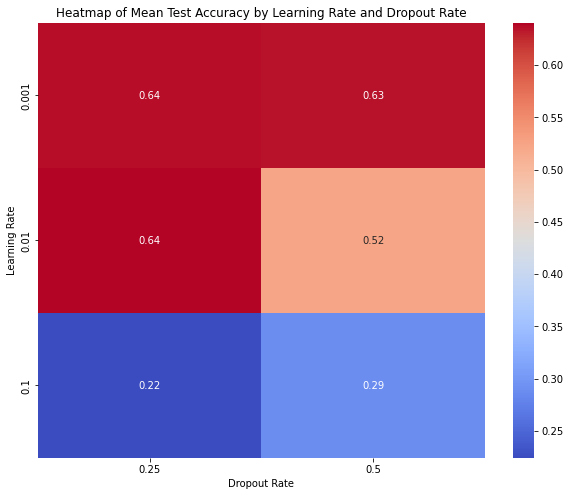

In [45]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'results_df' is your DataFrame with columns 'Learning Rate', 'Dropout Rate', 'Test Accuracy'
# pivot_table = results_df.pivot(index="Learning Rate", columns="Dropout Rate", values="Test Accuracy")
# plt.figure(figsize=(10, 8))
# sns.heatmap(pivot_table, annot=True, fmt=".2f", cmap='coolwarm')
# plt.title('Heatmap of Test Accuracy by Learning Rate and Dropout Rate')
# plt.show()

# Aggregate results by taking the mean of duplicates
agg_results_df = results_df.groupby(['Learning Rate', 'Dropout Rate']).agg({'Test Accuracy': 'mean'}).reset_index()

# Now pivot the aggregated DataFrame
pivot_table = agg_results_df.pivot(index='Learning Rate', columns='Dropout Rate', values='Test Accuracy')

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_table, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Heatmap of Mean Test Accuracy by Learning Rate and Dropout Rate')
plt.show()



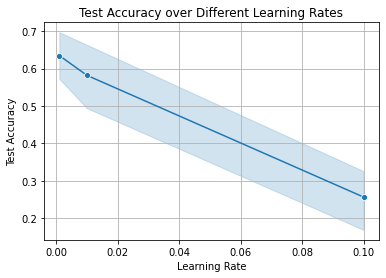

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.lineplot(data=results_df, x='Learning Rate', y='Test Accuracy', marker='o')
plt.title('Test Accuracy over Different Learning Rates')
plt.xlabel('Learning Rate')
plt.ylabel('Test Accuracy')
plt.grid(True)
plt.show()


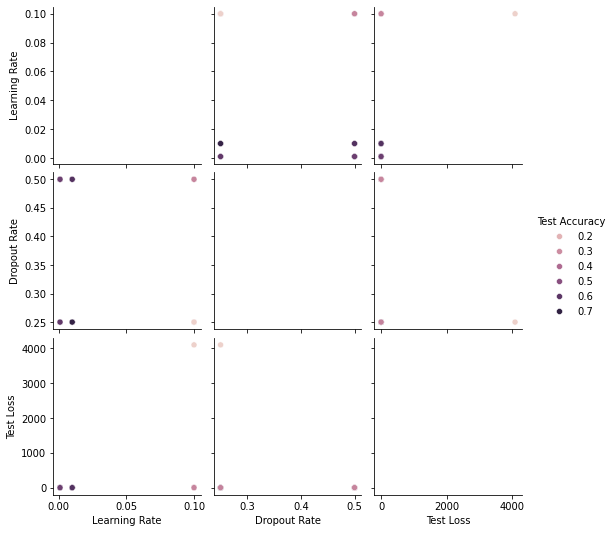

In [49]:
import seaborn as sns

sns.pairplot(results_df, hue='Test Accuracy', diag_kind='kde')
plt.show()


<ipython-input-51-423b26600683>:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Learning Rate', y='Test Accuracy', hue='Kernel Size', data=results_df, ci=None, palette='muted')


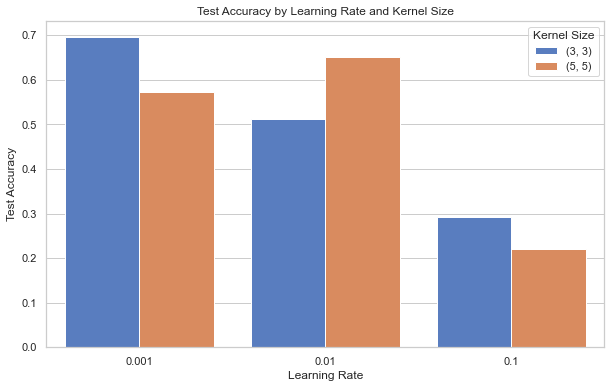

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the aesthetic style of the plots
sns.set(style="whitegrid")

# Creating the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Learning Rate', y='Test Accuracy', hue='Kernel Size', data=results_df, ci=None, palette='muted')
plt.title('Test Accuracy by Learning Rate and Kernel Size')
plt.xlabel('Learning Rate')
plt.ylabel('Test Accuracy')
plt.legend(title='Kernel Size')
plt.show()


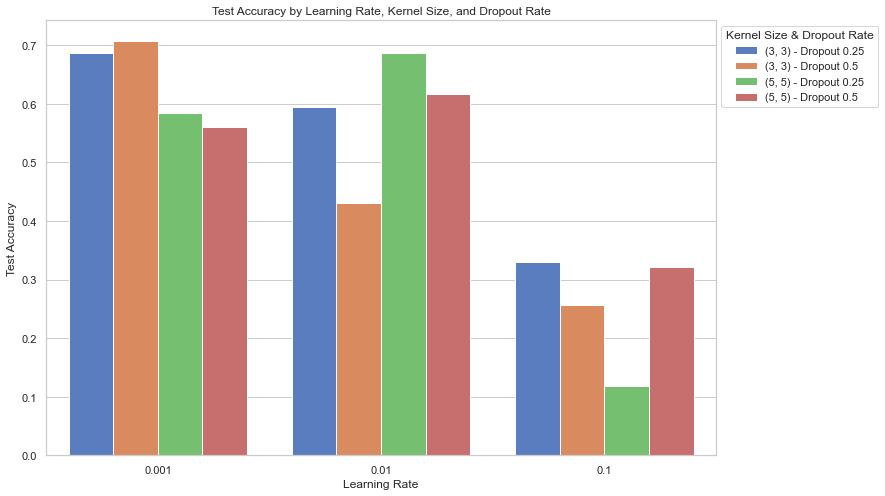

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# Create a new categorical column that combines kernel size and dropout rate for labeling
results_df['Kernel & Dropout'] = results_df.apply(lambda row: f'{row["Kernel Size"]} - Dropout {row["Dropout Rate"]}', axis=1)

plt.figure(figsize=(12, 8))
bar_plot = sns.barplot(x='Learning Rate', y='Test Accuracy', hue='Kernel & Dropout', data=results_df, palette='muted')
plt.title('Test Accuracy by Learning Rate, Kernel Size, and Dropout Rate')
plt.xlabel('Learning Rate')
plt.ylabel('Test Accuracy')
plt.legend(title='Kernel Size & Dropout Rate', loc='upper left', bbox_to_anchor=(1,1), ncol=1)
plt.show()
